What this code does

1.   Load `MNIST` dataset using custom functions
2.   Apply suitable transformations and data cleaning techniques.
3.   Flatten the images.
4.   Build a multi-layered fully connected network (FCN) and use it to perform a classification task on test dataset. 

*  `custom_MNIST` folder ([drive folder here](https://drive.google.com/drive/folders/1pLU_nCa1hjc_-p2GcEkK67TrlgJYmFjT?usp=sharing))
  *  `data_desc.csv` :- Contains test and train split of data along with its labels.
  * 50000 train and 12000 test data points stored in .npy format.

---


Import the necessary libraries you may require for the project, it was always easier to check what all can be useful by going through the documentation.


In [ ]:
#import necessary libraries
import keras
from keras.utils.np_utils import to_categorical
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
import glob
import pandas as pd
from scipy import misc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.preprocessing import image
import PIL
import torch
import sklearn.metrics
from tqdm import tqdm

from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


###_Step 2.a._ : Import data using custom functions

We now import our data through the pipelines Keras provides. It would require suitable customizations depending on the problem at hand.

Necessary transforms may also be created here.



In [ ]:
os.chdir("/content/gdrive/My Drive/Custom_MNIST")
df = pd.read_csv('data_desc.csv')

In [ ]:
df.head()


,file_name,split,label
0,img_0.npy,train,1.0
1,img_1.npy,train,5.0
2,img_2.npy,train,0.0
3,img_3.npy,train,1.0
4,img_4.npy,train,6.0


In [ ]:
train_data = df[df['split']=='train']
print(train_data)
test_data = df[df['split']=='val']
print(test_data)

           file_name  split  label
0          img_0.npy  train    1.0
1          img_1.npy  train    5.0
2          img_2.npy  train    0.0
3          img_3.npy  train    1.0
4          img_4.npy  train    6.0
...              ...    ...    ...
49995  img_49995.npy  train    8.0
49996  img_49996.npy  train    8.0
49997  img_49997.npy  train    0.0
49998  img_49998.npy  train    4.0
49999  img_49999.npy  train    9.0

[50000 rows x 3 columns]
           file_name split  label
50000  img_50000.npy   val    5.0
50001  img_50001.npy   val    7.0
50002  img_50002.npy   val    7.0
50003  img_50003.npy   val    1.0
50004  img_50004.npy   val    8.0
...              ...   ...    ...
61995  img_61995.npy   val    6.0
61996  img_61996.npy   val    1.0
61997  img_61997.npy   val    2.0
61998  img_61998.npy   val    2.0
61999  img_61999.npy   val    5.0

[12000 rows x 3 columns]


In [ ]:
temp_train_labels = train_data['label'].values
#Reducing train and test data size due to long runtime and frequent crashes
#Google drive timeout occurs often
index = list(range(25000, 50000))
train_labels = np.delete(temp_train_labels, index)

index2 = list(range(3000, 12000))
temp_test_labels = test_data['label'].values
test_labels = np.delete(temp_test_labels, index2)

(train_labels.shape)

(25000,)

In [ ]:
y_train = tf.keras.utils.to_categorical(train_labels)
y_test  = tf.keras.utils.to_categorical(test_labels)
print(y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
X_train=[]
X_test=[]

count=0;
for i in range(0,25000) :
  if(i % 100 == 0):
    print(i)
  path = 'data/img_'+str(i)+".npy"
  X_train.append(np.array(np.load(path,encoding='bytes')).reshape(28,28,1))
  count+=1
print(len(X_train))

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

In [ ]:
count=0;
for i in range(50000,53000) :
  if(i % 100 == 0):
    print(i)
  path ='data/img_'+str(i)+".npy"
  X_test.append(np.array(np.load(path,encoding='bytes')).reshape(28,28,1))
  count+=1
print(len(X_test))

50000
50100
50200
50300
50400
50500
50600
50700
50800
50900
51000
51100
51200
51300
51400
51500
51600
51700
51800
51900
52000
52100
52200
52300
52400
52500
52600
52700
52800
52900
3000


In [ ]:
fin_x_train = np.array(X_train)
fin_x_test = np.array(X_test)
fin_y_train = np.array(y_train)
fin_y_test = np.array(y_test)
print(fin_x_train.shape)
print(fin_x_test.shape)
print(fin_y_train.shape)
print(fin_y_test.shape)

(25000, 28, 28, 1)
(3000, 28, 28, 1)
(25000, 10)
(3000, 10)


###_Step 2.b._: Data visualization

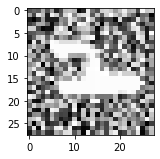

In [ ]:
plt.figure(figsize=[5,5])

# Display the  image in training data
plt.subplot(121)
curr_img = np.reshape(X_test[61], (28,28))
plt.imshow(curr_img, cmap='gray')

###_Step 3_ : Define Model architecture

After we make sure the data is in the format that we need, we can start builing a suitable model architecture. 

In [ ]:
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(250, activation='relu'))
model.add(Dense(10, activation='softmax'))

###Step 4: Training and Validation Loop

In [ ]:
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
) 
# Train the model.
model.fit(
  fin_x_train,
  fin_y_train,
  epochs=25,
  batch_size=32,
)

Epoch 1/25
782/782 [==============================] - 3s 4ms/step - loss: 1.0088 - accuracy: 0.6422
Epoch 2/25
782/782 [==============================] - 3s 4ms/step - loss: 0.5169 - accuracy: 0.8262
Epoch 3/25
782/782 [==============================] - 3s 4ms/step - loss: 0.4336 - accuracy: 0.8575
Epoch 4/25
782/782 [==============================] - 3s 4ms/step - loss: 0.3173 - accuracy: 0.8982
Epoch 5/25
782/782 [==============================] - 3s 4ms/step - loss: 0.2658 - accuracy: 0.9165
Epoch 6/25
782/782 [==============================] - 3s 4ms/step - loss: 0.2403 - accuracy: 0.9226
Epoch 7/25
782/782 [==============================] - 3s 4ms/step - loss: 0.2198 - accuracy: 0.9298
Epoch 8/25
782/782 [==============================] - 3s 4ms/step - loss: 0.1997 - accuracy: 0.9361
Epoch 9/25
782/782 [==============================] - 3s 4ms/step - loss: 0.1822 - accuracy: 0.9434
Epoch 10/25
782/782 [==============================] - 3s 4ms/step - loss: 0.1698 - accuracy: 0.9458

###Step 5: Results


In [ ]:
model.evaluate(
  fin_x_test,
  fin_y_test
)


94/94 [==============================] - 0s 3ms/step - loss: 0.1422 - accuracy: 0.9543


[0.14218637347221375, 0.9543333053588867]